In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats

In [3]:
diff_out = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"][:,:].flatten()
nona_out = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"][:,:].flatten()
spk_t_all = []
spk_no_all = np.zeros((2000))

E_neural_raw = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npz")

for i in tnrange(2000):
    temp_idx = scipy.sparse.find(E_neural_raw[-20*50000:,i])[0]
    spk_t_all.append(temp_idx)
    spk_no_all[i] = temp_idx.size

/tmp/ipykernel_8610/1151453866.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
post_time = 500
pre_time = 500

diff_sta = np.zeros((2000, post_time + pre_time))
nona_sta = np.zeros((2000, post_time + pre_time))
sta_count = np.zeros((2000))

for i in tnrange(2000):
    spk_no = spk_t_all[i].size
    spk_t = spk_t_all[i]
    for j in range(spk_no):
        t = spk_t[j]
        if (t>= pre_time) & (t<=20*50000 - post_time):
            diff_sta[i] += diff_out[t-pre_time : t+post_time] - np.mean(diff_out[t-pre_time : t+post_time])
            nona_sta[i] += nona_out[t-pre_time : t+post_time] - np.mean(nona_out[t-pre_time : t+post_time])
            sta_count[i] += 1
        
diff_sta /= sta_count.reshape(-1,1)

/tmp/ipykernel_8610/1725374863.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [5]:
diff_weights = np.max(diff_sta[:,pre_time:], 1) - np.min(diff_sta[:,:pre_time], 1)
nona_weights = np.max(nona_sta[:,pre_time:], 1) - np.min(nona_sta[:,:pre_time], 1)

In [19]:
#np.save("/media/hdd01/sklee/CA1_clust4-60/hand/syn_sta_weights.npy", diff_weights)
#np.save("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/syn_sta_weights.npy", nona_weights)

In [21]:
#old_diff_w = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["E_scale"]
#old_nona_w = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["E_scale"]

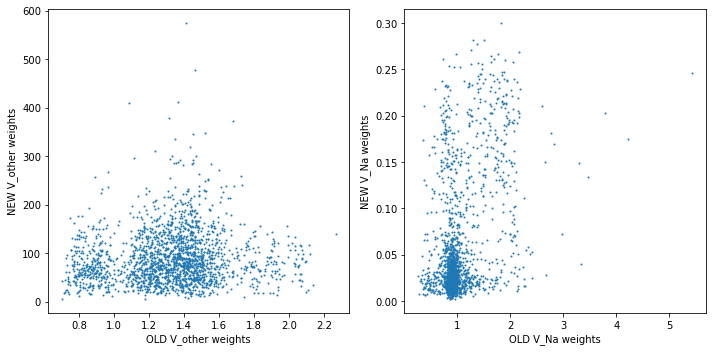

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

axs[0].scatter(old_nona_w, nona_weights, s=1)
axs[1].scatter(old_diff_w, diff_weights, s=1)

axs[0].set_xlabel("OLD V_other weights")
axs[1].set_xlabel("OLD V_Na weights")
axs[0].set_ylabel("NEW V_other weights")
axs[1].set_ylabel("NEW V_Na weights")

fig.tight_layout()
plt.show()

Text(0, 0.5, 'NEW V_Na weights')

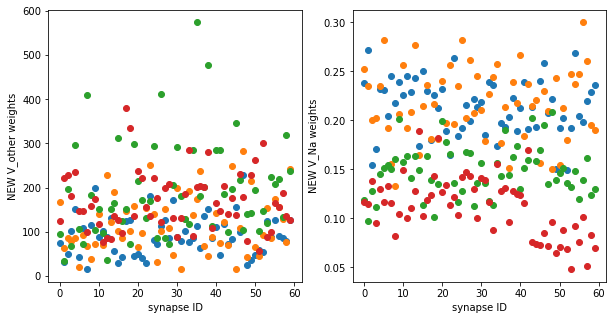

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

for i in range(4):
    axs[0].scatter(np.arange(60), nona_weights[880+60*i:880+60*(i+1)])
    axs[1].scatter(np.arange(60), diff_weights[880+60*i:880+60*(i+1)])
    
axs[0].set_xlabel("synapse ID")
axs[1].set_xlabel("synapse ID")
axs[0].set_ylabel("NEW V_other weights")
axs[1].set_ylabel("NEW V_Na weights")

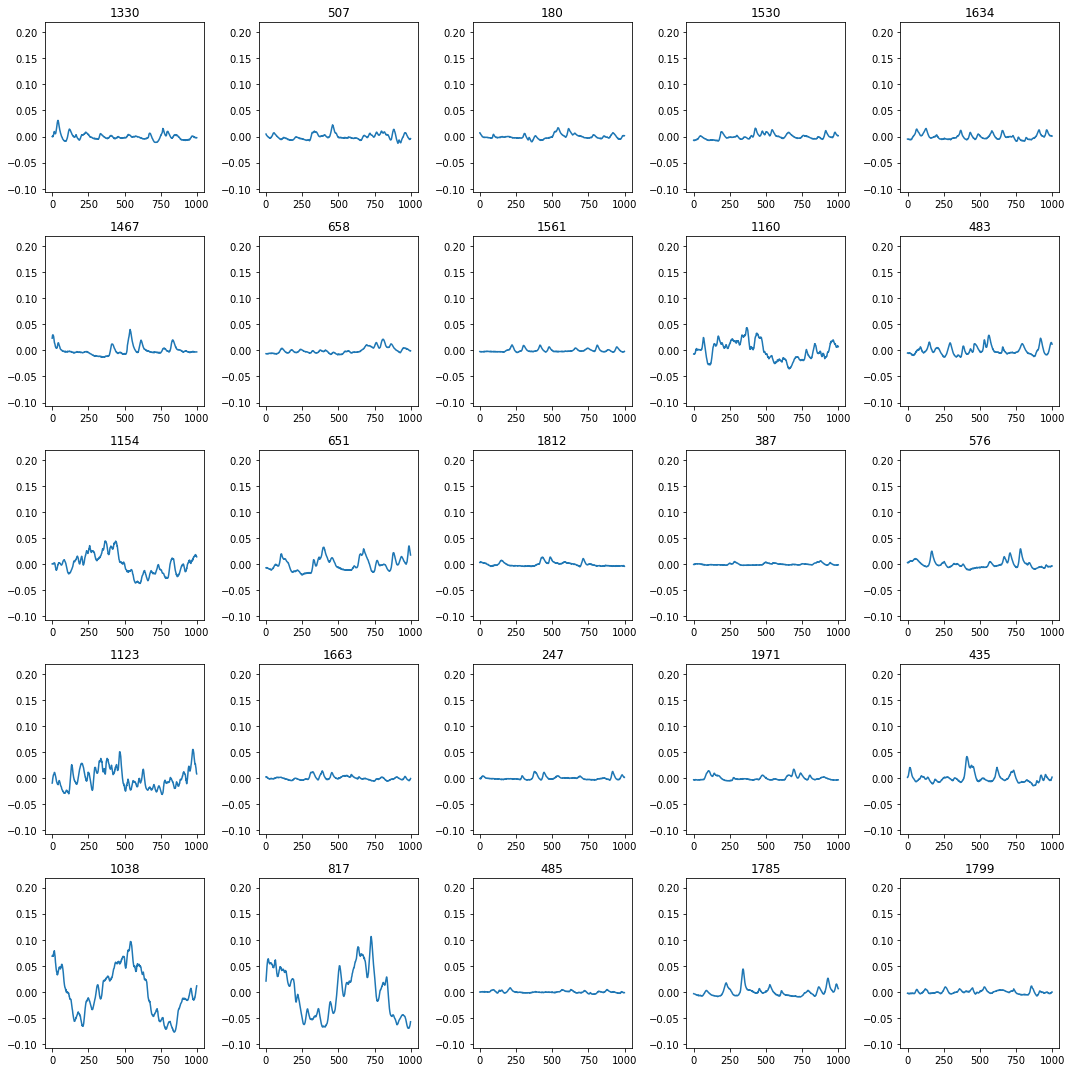

In [5]:
rand_idx = np.random.choice(2000,25,replace=False)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15,15))

for row in range(5):
    for col in range(5):
        idx = rand_idx[row*5+col]
        axs[row,col].plot(diff_sta[idx])
        axs[row,col].set_title(str(idx))
        axs[row,col].set_ylim(np.min(diff_sta), np.max(diff_sta))
        
fig.tight_layout()
plt.show()